<p style="text-align: center;"> <span style="color:skyblue"> <font size="5"> <b> CNN Neural Network - Image Classification  </b> </font> </p> </span> 
<p style="text-align: center;"> <b> <font font size="4"> By: Kofi Buahin </p> </b></font>

## Library Imports  

In [55]:
import os
import pathlib
import pickle
import warnings


#Standard Data Science Libraries
import numpy as np
import pandas as pd

#Image Processing Relevant Tools
from PIL import Image, ImageOps
from IPython.display import display

# Machine Learning Relevant Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
plt.style.use('ggplot')
rcParams['figure.figsize'] = (18, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Data Pre-processing

In [2]:
dir = str(pathlib.Path().resolve())
image_classes = [folder for folder in os.listdir(dir+'/natural_images') ]
image_classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [4]:
# dir = str(pathlib.Path().resolve())
# image_sizes = []
# for f in os.listdir(dir+'/natural_images'):
#     for picture in os.listdir(dir+'/natural_images/{}'.format(f)):
#         pic_dir = dir + '/natural_images/{}/{}'.format(f,picture)
#         pic_size = np.array(Image.open(pic_dir)).shape
#         image_sizes.append(pic_size)



We don't have images of the same size so we should rescale them. We do that using function below

In [9]:
# Function to Process images
def ImageProcessor(img_path):
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [16]:
def FolderProcessor(label):
    folder = dir + '/natural_images/{}'.format(label) 
    processed = [] # Storage container for images
    for img in os.listdir(folder): # For every image in the directory
        pic_dir = folder + '/{}'.format(img)
        processed.append(ImageProcessor(pic_dir))
    processed = pd.DataFrame(processed) # Convert to pd.DataFrame
    processed['class'] = label # Add a class column
    return processed

We can now merge all the processed data into a single dataframe here:

In [17]:
data = pd.concat([FolderProcessor(c) for c in image_classes])

We must now split the dataset into test and train and we must also encode the target variable class

In [56]:
y_vars = data['class']
X_vars = data.iloc[:,:-1]

y_encoded = LabelEncoder().fit_transform(y_vars)
y_categorical = to_categorical(y_encoded)


In [57]:
shuffle = np.arange(X_vars.shape[0])
np.random.seed(15)

np.random.shuffle(shuffle)
X = X_vars[shuffle]
y = y_categorical[shuffle]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25)

## Exploratory Data Analysis (If Needed)

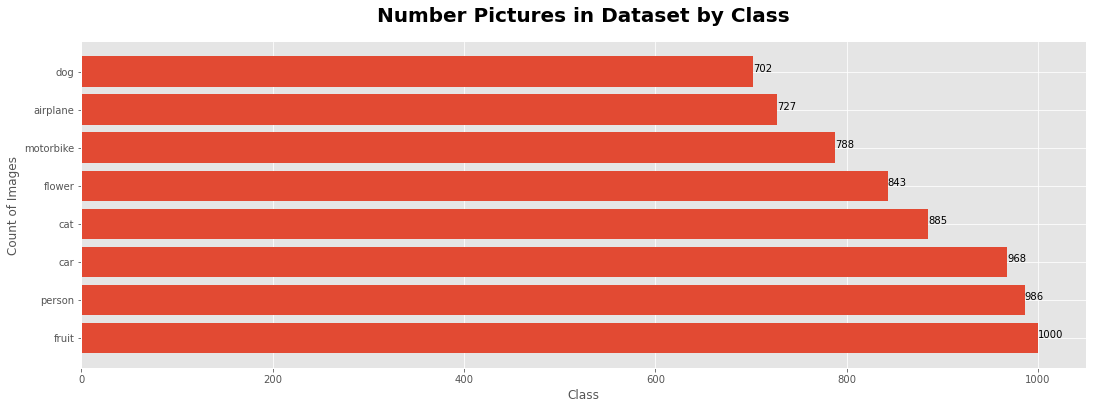

In [35]:
class_dist = data['class'].value_counts()

fig, ax = plt.subplots()

p = plt.barh(class_dist.index, class_dist)
ax.set_xlabel('Class')
ax.set_ylabel('Count of Images')
ax.set_title('Number Pictures in Dataset by Class')

bar_labels = class_dist # series of label
[ax.text(v, i, v) for i, v in enumerate(bar_labels)]

plt.title("Number Pictures in Dataset by Class", 
          loc= 'center',
          fontsize = 20,
          fontweight = 'bold',
          pad = 20, 
          color = 'black')

plt.show()

***Show some random pictures selected from the training set***

## Model Building

### Iteration 1 - MLP Classifier

In [ ]:
tf.random.set_seed(42)

mlp_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    model.add(layers.Dropout(rate=0.25))
    model.add(layers.Flatten())
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
    ])

mlp_nn.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_mlp = mlp_nn.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test)
)

### Iteration 2 - Basic Custom CNN Network Architecture

### Iteration 3 - Implementing Popular Architecture (LeNet-5 CNN)